In [1]:
import os
seed = 7701
def allaudiofiles(directory, audio_extensions=['.wav', '.mp3', '.flac', '.aac', '.ogg']):
    lista = []
    index = 0
    maxim = 2
    for root, _, files in os.walk(directory):
        if index == maxim:
            break
        for file in files:
            if index == maxim:
                break
            # Check if the file has a valid audio extension
            if any(file.lower().endswith(ext) for ext in audio_extensions):
                index = index + 1
                lista.append(os.path.join(root, file))
    return lista


directory = "um/"  # Replace with your directory path
file_name = "../russian37.mp3"
files = [file_name]#allaudiofiles(directory)
files

['../russian37.mp3']

In [2]:
import librosa
import numpy as np
audios = []
times = []
np.maximum
for i, file in enumerate(files):
    audio, sr = librosa.load(file, sr=None)
    duration = librosa.get_duration(y=audio, sr=sr) / sr
    #if i == 0:
    #    plt.plot(audio, "-", color="blue", label="reconstrcuted", lw=2)

    print("iter {} file name{}".format(i, file))
    print(audio.shape)
    print(librosa.stft(audio).shape)
    a = audio#librosa.stft(audio)
    print(a.shape)
    audios.append(a)
    aux_time = []
    curr_time = 0
    for value in audio:
        aux_time.append(curr_time)
        curr_time = curr_time + duration
    times.append(aux_time)
audios = np.asarray(audios)
times = np.asarray(times)
files

iter 0 file name../russian37.mp3
(1256964,)
(1025, 2456)
(1256964,)


['../russian37.mp3']

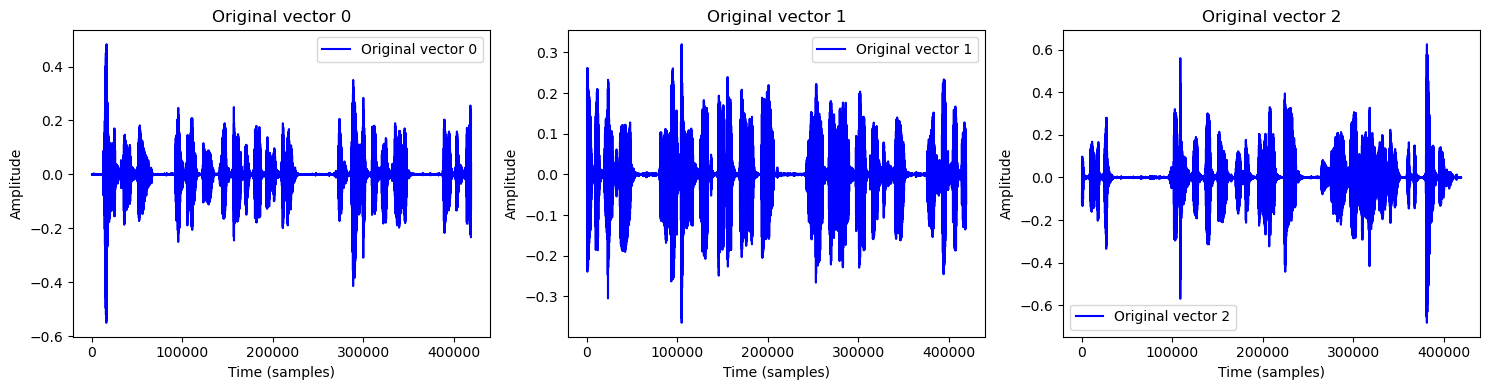

In [3]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns
segments = np.array_split(audio,3)
for i, (ax, segment) in enumerate(zip(axes, segments)):
    ax.plot(segment, label=f"Original vector {i}", color='b')
    ax.set_title(f"Original vector {i}")
    ax.set_xlabel("Time (samples)")
    ax.set_ylabel("Amplitude")
    ax.legend()
plt.tight_layout()
plt.show()

In [26]:
from sklearn.decomposition import SparseCoder, DictionaryLearning
import matplotlib.pyplot as plt

alpha = .01
transform_alpha = alpha
# lars_lasso
# dictionary = DictionaryLearning(n_components=100, random_state=seed, alpha=alpha, fit_algorithm="lars", transform_algorithm="lasso_lars", transform_alpha=transform_alpha)
# lars_lasso#dictionary.fit(np.real(audios[0]))
split_audio = np.array_split(audio, 3)
for index, i in enumerate(split_audio):
    split_audio[index] = librosa.stft(i)
dictionary_cd = DictionaryLearning(n_components=100, random_state=seed, alpha=alpha, fit_algorithm="cd", transform_algorithm="lasso_cd", transform_alpha=transform_alpha)
z = dictionary_cd.fit_transform(np.real(split_audio[0]))

In [27]:
n_atoms = 1024  # Number of atoms
#dictionary_random = np.random.randn(np.real(split_audio[0]).shape[0], n_atoms) #generates samples from the standard normal distribution (mean = 0, variance = 1)
print(dictionary_cd.components_.shape)
print(z.shape)
print(split_audio[1].shape)

(100, 819)
(1025, 100)
(1025, 819)


In [42]:
# lars_lasso
#coder = SparseCoder(dictionary=dictionary.components_, transform_alpha=transform_alpha,transform_algorithm="lasso_lars")
#density = len(np.flatnonzero(x))
#x = np.ravel(np.dot(x, D_fixed))
#x = coder.transform(np.real(audios[0]))
#reconstructed_signal = np.dot(x, dictionary.components_)

coder_cd = SparseCoder(dictionary=dictionary_cd.components_, transform_alpha=transform_alpha,transform_algorithm="lasso_cd")
#density = len(np.flatnonzero(x))
#x = np.ravel(np.dot(x, D_fixed))
x_cd = coder_cd.transform(np.real(split_audio[0]))
reconstructed_signal_cd = np.matmul(x_cd, dictionary_cd.components_)
reconstructed_audio_cd = librosa.istft(reconstructed_signal_cd)

(1025, 819)
(418816,)
(418816,)


/var/folders/jv/l3r2cxzx6gb2fbrlcl_9r2qc0000gn/T/ipykernel_98440/3144793595.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


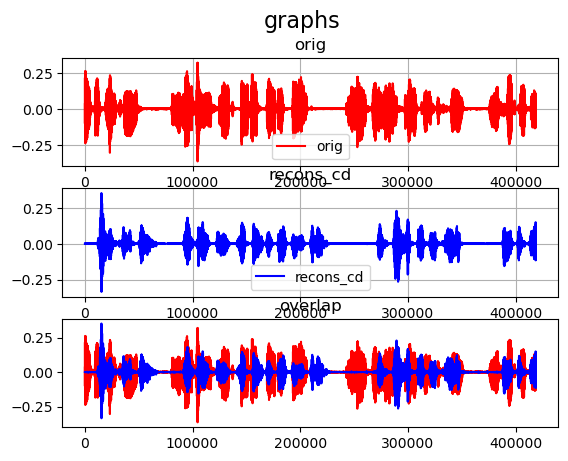

In [43]:
orig = librosa.istft(split_audio[1])
print(reconstructed_signal_cd.shape)
print(reconstructed_audio_cd.shape)
print(orig.shape)
"""#squared_error = np.sum(audios - x) ** 2
plt.plot(
            orig,
            "-",
            color="red",
            lw=2,
            label="original",
            #label="%s: %s nonzero coefs,\n%.2f error" % ("pff", density, squared_error),
        )
plt.plot(reconstructed_audio, "-", color="blue", label="reconstrcuted", lw=2)
plt.plot(reconstructed_audio_cd, "-", color="green", label="reconstrcuted with cd", lw=2)
plt.legend()
plt.show()"""
# %matplotlib inline
fig, axes = plt.subplots(3, 1)  # 4 rows, 4 columns
fig.suptitle('graphs', fontsize=16)  # Main title
axes[0].plot(orig, color="red")
#axes[1].plot(reconstructed_audio, color="green")
axes[1].plot(reconstructed_audio_cd, color="blue")
axes[2].plot(orig, color="red")
axes[2].plot(reconstructed_audio_cd, color="blue")
axes[0].set_title("orig")
#axes[1].set_title("recons")
axes[1].set_title("recons_cd")
axes[2].set_title("overlap")
axes[0].grid(True)
axes[1].grid(True)
#axes[3].plot(orig, "-", color="red", label="original")
#axes[3].plot(reconstructed_audio_cd, "-", color="blue", label="recons_cd")
#axes[3].plot(reconstructed_audio, "-", color="green", label="recons")
#axes[3].grid(True)
#axes[3].set_ylim(-0.2,0.2)
#axes[3].set_title("overlaps")
axes[0].legend([axes[0].get_title()],loc="lower center")
#axes[1].legend([axes[1].get_title()],loc="upper center")
axes[1].legend([axes[1].get_title()],loc="lower center")
#axes[2].set_xlim(16000,17000)
fig.show()

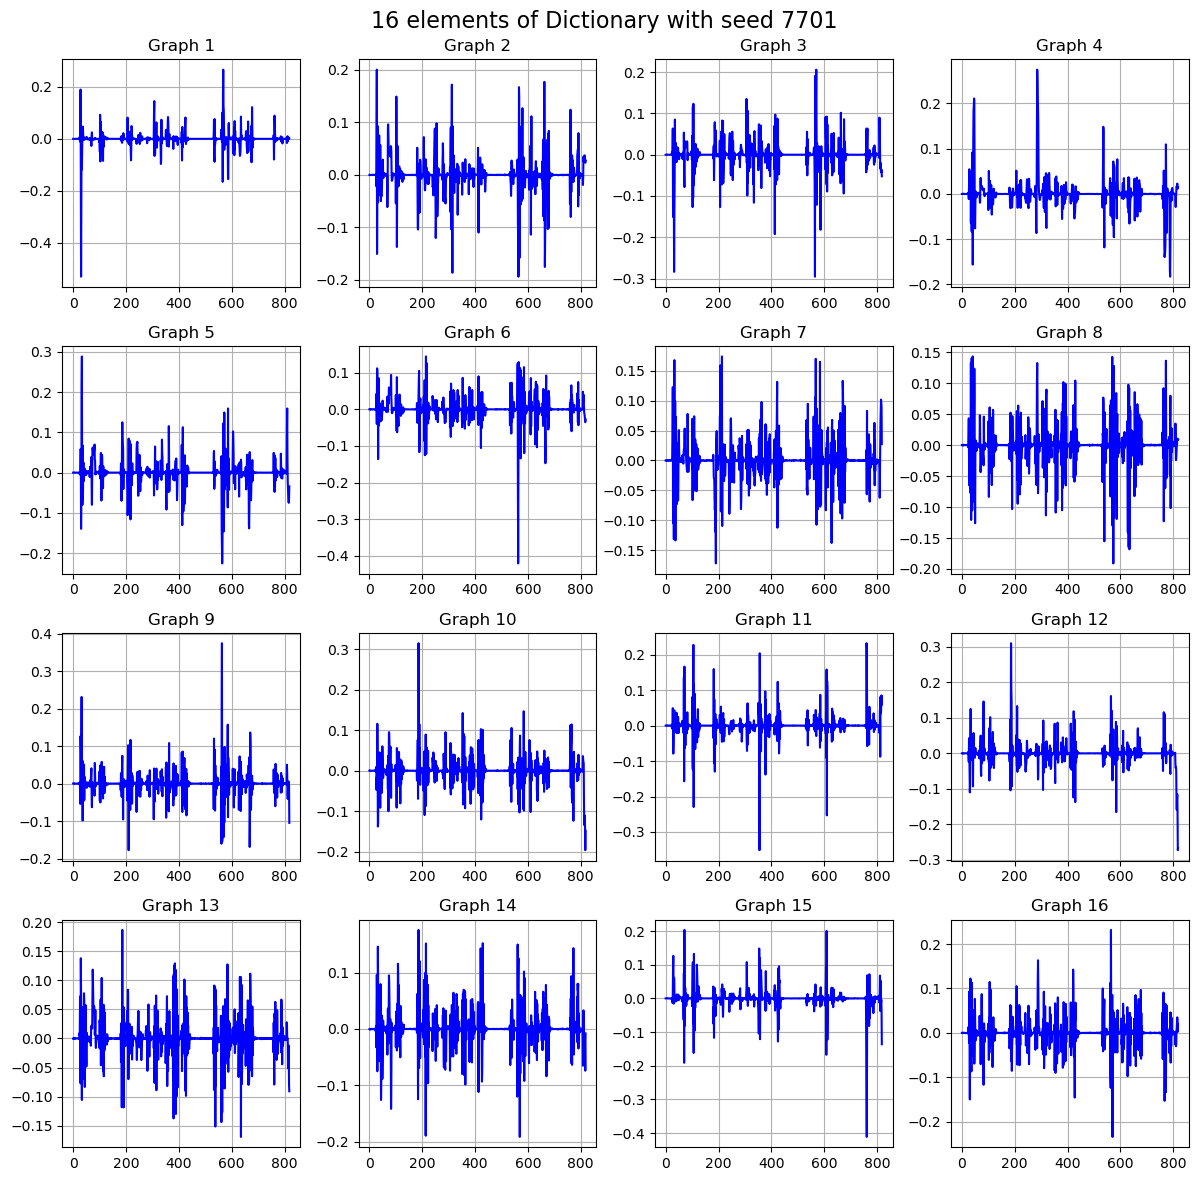

In [8]:
#plt.plot(dictionary.components_[1], "-", color="blue", label="component", lw=2)

# %matplotlib inline
fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # 4 rows, 4 columns
fig.suptitle('16 elements of Dictionary with seed {}'.format(seed), fontsize=16)  # Main title

for i in range(4):
    for j in range(4):
        # Create a unique function for each subplot
        axes[i, j].plot(dictionary_cd.components_[i*4+j], color='blue')  # Plot the graph
        axes[i, j].set_title(f'Graph {i*4 + j + 1}')  # Set subplot title
        axes[i, j].grid(True)  # Add grid

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [9]:
import soundfile as sf
sf.write('um/reconstructed_audio.wav', reconstructed_audio_cd, sr)
print("{} bytes".format(os.path.getsize(file_name)))
print("{} bytes".format(os.path.getsize('um/reconstructed_audio.wav')))
print("{} bytes".format(os.path.getsize(file_name)-os.path.getsize('um/reconstructed_audio.wav')))

457246 bytes
837676 bytes
-380430 bytes


In [10]:
from sklearn.metrics import mean_squared_error

print("MSE (orig reconstr_cd): {}".format(mean_squared_error(orig, reconstructed_audio_cd)))
print("Average orig: {} \n\tAverage recons: {} \n\tAverage Difference: {}".format(np.average(orig), np.average(reconstructed_audio_cd), np.average(orig-reconstructed_audio_cd)))


ValueError: Found input variables with inconsistent numbers of samples: [1025, 418816]

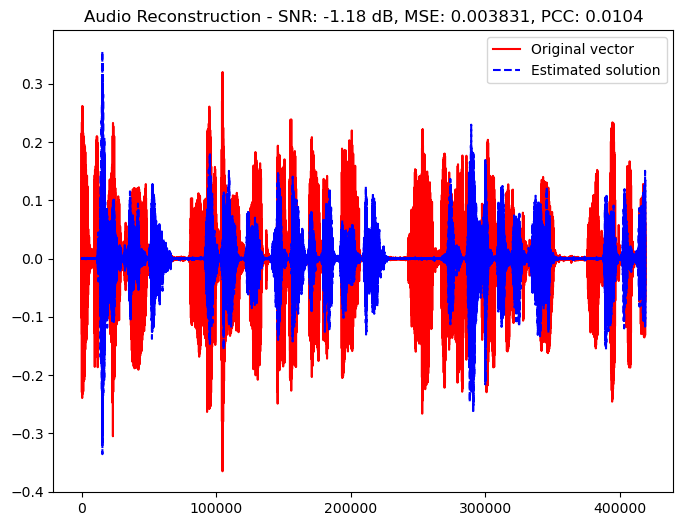

In [ ]:
#a,sr = librosa.load("um/5-209698-A-38.wav")

#plt.plot(librosa.istft(librosa.stft(a)), "-", color="blue", label="reconstrcuted", lw=2)

#similarity in frequency domain - multiply the two signaks abd tajee fft ths will show if the signals share smilitarty 
#similarity in frequency domain - take fft of both multiply and sum

# 6: Compute Evaluation Metrics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
def compute_metrics(original, reconstructed):
    min_len = min(len(original), len(reconstructed))
    original = original[:min_len]
    reconstructed = reconstructed[:min_len]# Ensure both signals are the same length

    noise = original - reconstructed
    snr = 10 * np.log10(np.sum(original**2) / np.sum(noise**2))# Signal-to-Noise Ratio (SNR)

    mse = mean_squared_error(original, reconstructed)# Mean Squared Error (MSE)

    pcc, _ = pearsonr(original, reconstructed)# Pearson Correlation Coefficient (PCC)

    return snr, mse, pcc

snr, mse, pcc = compute_metrics(orig, reconstructed_audio_cd)
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(orig, label="Original vector", color="red")
plt.plot(reconstructed_audio_cd, '--', label="Estimated solution", color="blue")
plt.legend()
plt.title(f"Audio Reconstruction - SNR: {snr:.2f} dB, MSE: {mse:.6f}, PCC: {pcc:.4f}")
plt.show()

In [ ]:
c = split_audio[0] @ 